<a href="https://colab.research.google.com/github/josevabo/analise_tuberculose/blob/main/Analise_Tuberculose_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TUBERCULOSE NO BRASIL

#Contexto Geral
---
##O que é a doença?

> A tuberculose (TB) é uma doença infectocontagiosa grave transmitida pelas vias aéreas e provocada em grande parte dos casos  pela bactéria Mycobacterium tuberculosis (também conhecida como bacilo de Koch), podendo ser causada também, embora mais raramente, por outras espécies de agentes [...]. A doença afeta principalmente os pulmões e pode atingir outros órgãos do corpo como rins, meninges e ossos. **A transmissão da doença pode ocorrer por aerossóis, como ocorre com a gripe, e contato direto com o infectado**.

##Panorama mundial
> **A tuberculose está entre as 10 causas de morte no mundo**: são 10 milhões de casos por ano e mais de 1 milhão de óbitos.

> A OMS (Organização Mundial da Saúde) declarou a TB (tuberculose) em estado de emergência. **1/3 da população esta infectada pelo M. tuberculosis**, o que corresponde a cerca de 2 bilhões de pessoas. Deste total, 8 milhões evoluem para a doença e 2 milhões podem vir a óbito a cada ano. 

##Existe tratamento?
> **A vacina BCG**, que faz parte do programa nacional de vacinação, aplicada logo na infância tem por objetivo proteger o organismo contra a doença.

> Quando ocorre contaminação, **o tratamento da tuberculose é administrado através de antibióticos**. O tratamento para tuberculose é baseado em 2 fases: a fase intensiva, onde são  utilizados 3 antibióticos por 2 meses(isoniazida, rifampicina, pirazinamida e etambutol); e a fase de manutenção (subsequente aos 2 meses da fase intensiva) que consiste no uso de rifampicina e isoniazida.

##Por que não foi erradicada ainda?
> A bactéria responsável pela transmissão da doença tem características físicas que a torna mais resistente a medicamentos. Pois possui uma parede celular composta por ácidos micólicos que dificultam a penetração das drogas utilizadas.

##Situação da Tuberculose no Brasil
>No Brasil, em 2019, foram registrados 73.864 mil casos novos da doença. A taxa de mortalidade caiu cerca de 8% na última década. Foram 4.881 mortes em 2008, contra 4.490 em 2018.

> Em 2020, o Brasil ainda registra 200 novos casos de tuberculose por dia, segundo dados do Ministério da Saúde.

> **Um dos fatores que contribuem para a situação do Brasil é a reinfecção por conta do abandono de tratamento**: ao final dos 2 meses da fase intensiva, o paciente sente uma melhora e não dá continuidade ao tratamento, o que leva ao surgimento de cepas resistentes a antibióticos. Casos hospitalares e carcerários também contribuem para o aumento da resistência aos medicamentos, o que nos leva a pensar em outro fator contribuinte: **a aglomeração de pessoas nos centros urbanos e comunidades carentes que facilitam a transmissão do patógeno que se dá por aerossóis, contato com pessoas contaminadas.** Essa é uma realidade muito bem retratada em cidades do Sudeste brasileiro, como Rio de Janeiro.

##Campanha de prevenção e tratamento
> *Para reduzir o número de casos e óbitos por tuberculose no Brasil, foram estabelecidas algumas medidas:*

* Foi criado o Programa Nacional de Controle, que visa a integração do controle de TB com a atenção básica, garantindo a efetiva ampliação do acesso ao diagnóstico e tratamento;
* Foi elaborado Plano Estratégico para o Controle da Tuberculose, Brasil 2007-2015
* Foi elaborado em 2011, pelo Ministério da Saúde, o Manual de Recomendações  Para o Controle de Tuberculose no Brasil;
* Em 2012, criou-se o Grupo de Trabalho de Tuberculose no âmbito do MERCOSUL (GT-TB/MERCOSUL), que identifica e analisa pontos como exames laboratoriais, vigilância epidemiológica, identificação sintomática, entre outros.

> Então, embora as taxas de incidência e de mortalidade por tuberculose no Brasil ainda sejam altas, elas têm tido um queda de modo gradual nos últimos anos, devido ao impacto causado por todas essas estratégias e medidas adotadas.

> Apesar de ter cura, é justamente o abandono do tratamento o principal motivo para a tuberculose ainda continuar causando mortes no país.  O tratamento oferecido no Sistema Único de Saúde (SUS) dura, em média, seis meses. Apesar da melhora dos sintomas já nas primeiras semanas após início, a cura só é garantida ao final da terapia.


##Importando bibliotecas e definindo funções básicas

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
def cria_palette_sat(valores, R = 1, G = 1, B = 1):
  val_max = max(valores)
  val_min = min(valores)
  levels = []
  for val in valores:
    #manobras para criar uma paleta gradativa de tons de vermelho
    level = (val - val_min) /(val_max - val_min)
    level = level/2 + .5
    if level > .3:
      levels.append([R, G - level, B - level])
    else:
      levels.append([R, G - 0.3 - (level/2), B - 0.3 - (level/2)])
  return levels

##Exploração inicial dos dados

##Fonte dos dados:
**DATASUS**:
Registro de casos de tuberculose no Brasil de 2001 a 2020.

[Casos de Tuberculose - Desde 2001 (SINAN)](http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=31009407)

##O que há no dataset?

Como podemos ver abaixo, na tabela importada do sistema TabNet, temos um registro histórico que apresenta ano a ano os casos registrados de tuberculose para cada UF do Brasil.

In [88]:
url_tub = 'https://raw.githubusercontent.com/josevabo/analise_tuberculose/main/dados/dados_tuberculose_casos.csv'
dados = pd.read_csv(url_tub, sep=";")
display(dados.head(2))
dados.tail(2)

,UF de residência,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,11 Rondônia,672,637,648,627,630,521,551,566,681,571,680,692,699,679,653,763,773,676,739,575,13033
1,12 Acre,357,364,367,353,319,389,305,298,352,340,389,392,391,440,348,443,485,483,585,539,7939


,UF de residência,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
27,00 Ignorado/exterior,670,818,888,1046,932,31,51,68,64,70,70,69,62,1,55,62,65,59,69,41,5191
28,Total,87265,92859,93773,92979,92055,85031,84600,86768,86318,85381,87813,86183,86208,85213,85452,86207,91301,95539,97629,83678,1772252


###Organização e limpeza inicial dos dados

In [89]:
#Mapear estados por sigla UF
map_estados = {'Rondônia':'RO', 'Acre':'AC', 'Amazonas':'AM', 'Roraima':'RR', 'Pará':'PA', 'Amapá':'AP', 'Tocantins':'TO',
       'Maranhão':'MA', 'Piauí':'PI', 'Ceará':'CE', 'Rio Grande do Norte':'RN', 'Paraíba':'PB',
       'Pernambuco':'PE', 'Alagoas':'AL', 'Sergipe':'SE', 'Bahia':'BA', 'Minas Gerais':'MG',
       'Espírito Santo':'ES', 'Rio de Janeiro':'RJ', 'São Paulo':'SP', 'Paraná':'PR',
       'Santa Catarina':'SC', 'Rio Grande do Sul':'RS', 'Mato Grosso do Sul':'MS',
       'Mato Grosso':'MT', 'Goiás':'GO', 'Distrito Federal':'DF', 'Ignorado/exterior':'Ignorados',
       'al':'Total'}

def rename_list_estados(key):
  return map_estados[key]

colunas = dados.columns.to_list()
colunas[0] = 'UF'
dados.columns = colunas
dados['UF'] = dados['UF'].str[3:]
estados = dados['UF']
estados = list(map(rename_list_estados, estados))
dados['UF'] = estados
dados.set_index('UF', inplace=True)
dados.head()
dados.tail()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
UF,,,,,,,,,,,,,,,,,,,,,
MT,1458,1278,1289,1177,1344,1333,1179,1288,1161,1369,1371,1580,1889,1779,1447,1460,1422,1405,1513,1176,27918
GO,1220,1205,1277,1142,1156,1015,1032,996,1047,1060,1053,1118,1124,1039,1135,1072,1210,1263,1235,986,22385
DF,383,384,418,395,414,399,445,382,335,333,364,438,366,422,396,386,361,419,424,345,7809
Ignorados,670,818,888,1046,932,31,51,68,64,70,70,69,62,1,55,62,65,59,69,41,5191
Total,87265,92859,93773,92979,92055,85031,84600,86768,86318,85381,87813,86183,86208,85213,85452,86207,91301,95539,97629,83678,1772252


##Registro histórico do total de casos de tuberculose no Brasil

[Text(0, 0.5, 'Número de casos'), Text(0.5, 0, 'Ano')]

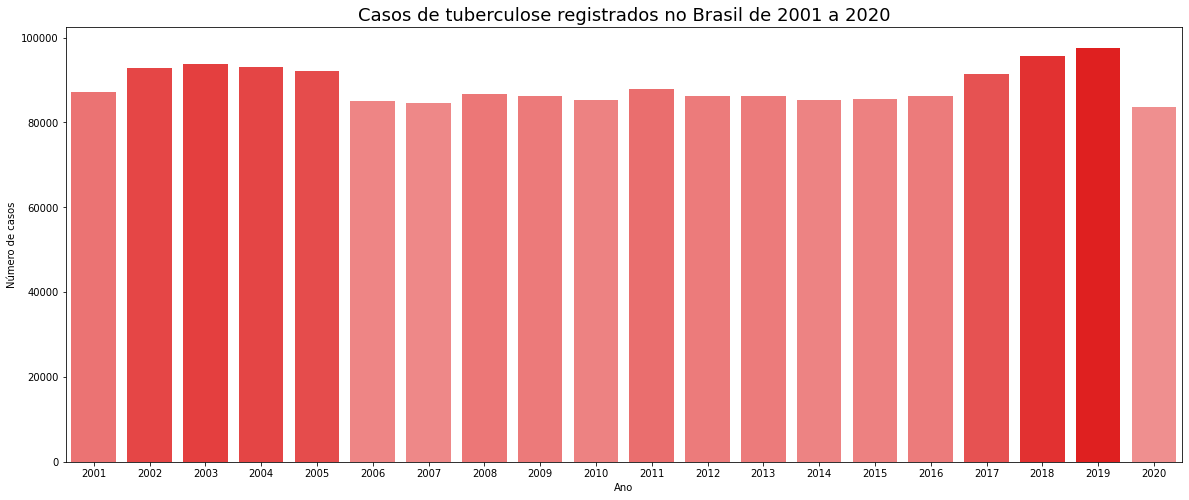

In [90]:
ax = sns.barplot(x = dados.T['Total'][:-1].index, y = dados.T['Total'][:-1].values, palette=cria_palette_sat(dados.T['Total'][:-1].values))
plt.title("Casos de tuberculose registrados no Brasil de 2001 a 2020", fontdict={'fontsize':18})
ax.figure.set_figheight(8)
ax.figure.set_figwidth(20)
ax.set(xlabel='Ano', ylabel='Número de casos')

Observando os dados históricos no Brasil percebemos que:
* Os picos de casos são mais recentes, ocorrendo em 2018 e 2019.
* A quantidade de casos se mantém relativamente constantes, mesmo com as campanhas de prevenção citadas no início.

OBS.: Como a população brasileira não se manteve a mesma no período, é Importante considerarmos número de casos proporcionais à população.

##Casos por UF

Text(0.5, 1.0, 'Casos de tuberculose registrados por estado de 2001 a 2020')

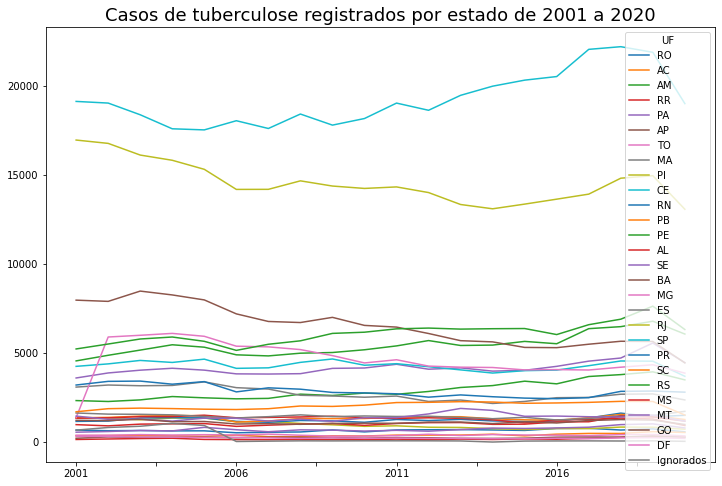

In [91]:
ax = dados.drop("Total").T.drop("Total").plot(figsize=(12,8))
plt.title("Casos de tuberculose registrados por estado de 2001 a 2020", fontdict={'fontsize':18})

Text(0.5, 1.0, 'Casos de tuberculose registrados em SP, MG, RJ e BA de 2001 a 2020')

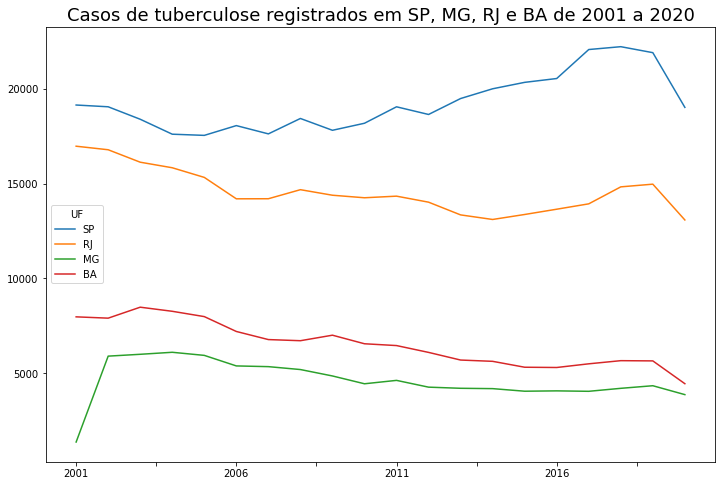

In [92]:
ax = dados.drop("Total").T[['SP','RJ','MG','BA']].drop('Total').plot(figsize=(12,8))
plt.title("Casos de tuberculose registrados em SP, MG, RJ e BA de 2001 a 2020", fontdict={'fontsize':18})

Acima, apesar de parecer confuso observar todas as linhas, podemos ver que os estados SP e RJ estão sempre acima em todo o período analisado.
Disso podemos concluir o seguinte:
* A superioridade numérica em casos é esperada para os estados mais populosos
* Além da população maior, maiores aglomerações urbanas favorecem a transmissão da doença, como visto no início.
* No segundo gráfico vemos MG com registros abaixo de RJ, mas MG possui população maior. Uma hipótese seria a confirmação de que aglomerações levam a maior transmissão, pois RJ possui maiores metrópoles e centros urbanos mais densos demograficamente, mesmo tendo população menor que MG

In [93]:
#Criar lista ordenada por total
ordem_totais = dados['Total'].sort_values(ascending=False).index
ordenado_por_total = dados.T[ordem_totais[1:]]
ordenado_por_total.head()

UF,SP,RJ,BA,RS,PE,MG,CE,PA,AM,PR,MA,SC,ES,MT,PB,AL,RN,GO,MS,PI,SE,RO,AC,DF,Ignorados,AP,TO,RR
2001,19139,16968,7973,5231,4560,1374,4253,3600,2330,3204,3088,1702,1632,1458,1364,1341,1160,1220,978,1379,554,672,357,383,670,214,317,144
2002,19046,16781,7904,5508,4875,5902,4392,3882,2279,3410,3204,1875,1569,1278,1386,1359,1179,1205,910,1351,592,637,364,384,818,288,309,172
2003,18389,16125,8482,5790,5167,5999,4586,4038,2369,3425,3164,1906,1559,1289,1457,1427,1352,1277,1007,1251,650,648,367,418,888,263,282,198
2004,17601,15832,8266,5902,5466,6105,4473,4146,2557,3251,3180,1880,1529,1177,1494,1428,1373,1142,1024,1349,626,627,353,395,1046,268,274,215
2005,17539,15324,7986,5660,5330,5942,4658,4040,2485,3395,3381,1846,1439,1344,1479,1509,1356,1156,1039,1349,827,630,319,414,932,271,258,147


### Estados com maior ocorrência de tuberculose

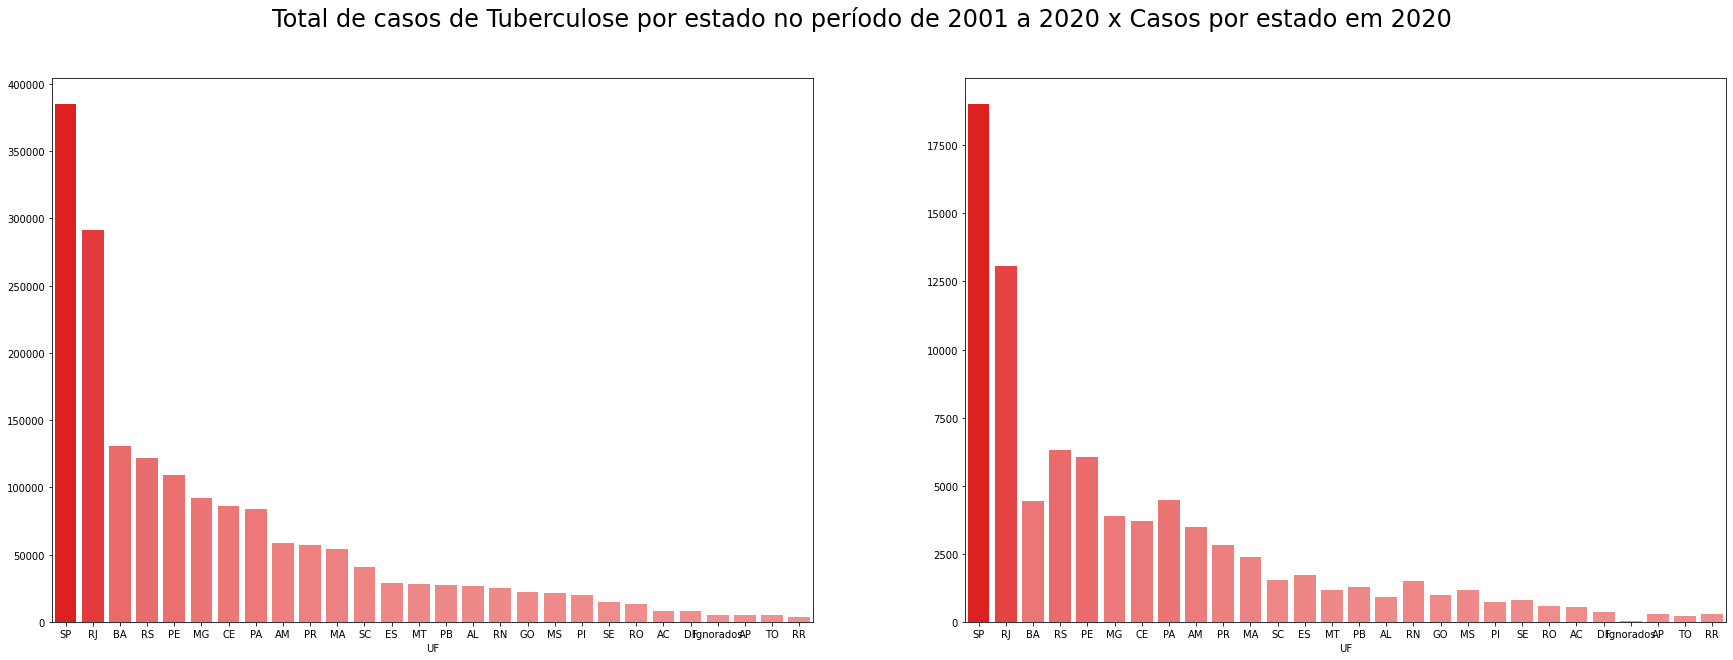

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Total de casos de Tuberculose por estado no período de 2001 a 2020 x Casos por estado em 2020', fontsize=24)
fig.set_figheight(10)
fig.set_figwidth(30)
sns.barplot(x = ordenado_por_total.loc['Total',:].index, y = ordenado_por_total.loc['Total',:].values, palette = cria_palette_sat(ordenado_por_total.loc['Total',:].values), ax=ax1)
sns.barplot(x = ordenado_por_total.loc['2020',:].index, y = ordenado_por_total.loc['2020',:].values, palette = cria_palette_sat(ordenado_por_total.loc['2020',:].values), ax=ax2)

A ordem de estados com maiores casos em 2020 condiz em geral com a ordem dos totais acumulados.

Alguns estados tomaram a frente de outros, como RS e PE que em 2020 tiveram mais casos do que BA, que tem um total de casos desde 2001 maior.

##Considerando população no cálculo

In [95]:
#dataset população 2020
map_pop = {'SP':46289333,'MG':21292666,'RJ':17366189,'BA':14930634,'PR':11516840,'RS':11422973,'PE':9616621,'CE':9187103,'PA':8690745,'SC':7252502,'MA':7114598,'GO':7113540,
'AM':4207714,'ES':4064052,'PB':4039277,'RN':3534165,'MT':3526220,'AL':3351543,'PI':3281480,'DF':3055149,'MS':2809394,'SE':2318822,'RO':1796460,'TO':1590248,'AC':894470,
'AP':861773,'RR':631181}

pop_2020 = pd.Series(data=map_pop,index=estados[:-2])
pop_2020.head()

RO    1796460
AC     894470
AM    4207714
RR     631181
PA    8690745
dtype: int64

In [96]:
#dataset população 2001
url_pop_2001 = 'https://raw.githubusercontent.com/josevabo/BootCamp-DS-Alura/main/dados/UF_Municipio_2001.csv'
pop_2001 = pd.read_csv(url_pop_2001, sep=';', skiprows=3)
pop_2001 = pop_2001.drop(['COD', 'COD.', 'MUNICÍPIOS', 'Unnamed: 5','Unnamed: 6'], axis=1).drop(0)
pop_2001['POP-2001'] = pop_2001['POP-2001'].str.replace('.','').astype(int)
pop_2001 = pop_2001.groupby('SIGLA').sum()
pop_2001.tail()

,POP-2001
SIGLA,
RS,10309819
SC,5448736
SE,1817301
SP,37630106
TO,1184895


In [97]:
#gerar serie de populacao de 2001 a 2020
pop_2001_total = int(pop_2001.sum())
pop_2020_total = int(pop_2020.sum())
lista = [] 
for i in range(0,20):
  lista.append(round(pop_2001_total + i*(pop_2020_total - pop_2001_total)/19))

anos = [str(ano) for ano in range(2001,2021)]
pop_brasil = pd.Series(lista, index=[anos])
pop_brasil.head()


2001    172385826
2002    174457924
2003    176530022
2004    178602121
2005    180674219
dtype: int64

Queda de 8.02% no número relativo de casos de 2001 a 2019


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Casos de tuberculose por ano a cada 100.000 habitantes no Brasil de 2001 a 2020')

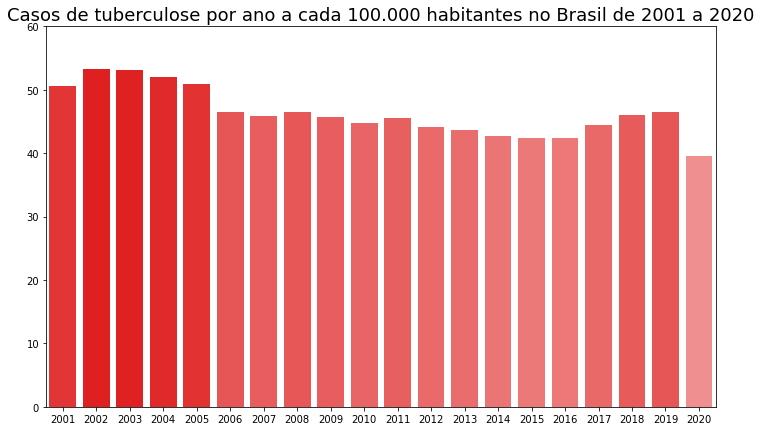

In [98]:

casos_por_ano_hab = dados.T['Total'][:'2020']*100000/lista
print('Queda de {}% no número relativo de casos de 2001 a 2019'.format(round((1 - casos_por_ano_hab['2019']/casos_por_ano_hab['2001'])*100,2)))

levels = cria_palette_sat(casos_por_ano_hab)

#Gerar grafico
plt.figure(figsize=(12,7))
plt.ylim(0,60)
sns.barplot(casos_por_ano_hab.index, casos_por_ano_hab.values, palette=levels)#'Blues_d')
plt.title("Casos de tuberculose por ano a cada 100.000 habitantes no Brasil de 2001 a 2020", fontdict={'fontsize':18})

No gráfico acima analisamos a evolução dos casos de tuberculose no período de 2001 para cada 100.000 habitantes.

Ao olhar os dados percebemos que, diferente da análise inicial considerando apenas total absoluto de casos, **quando comparamos os anos considerando a variação populacional, 
a quantidade relativa de casos teve seu pico nos anos iniciais de registro**. 

**Embora se perceba uma tendência de leve queda (8% de 2001 a 2019), os números não sugerem uma queda forte que indique um avanço no combate à doença. Principalmente por ser uma doença totalmente tratável hoje.**

Como indicado em textos especializados, **o abandono precoce no tratamento deve ser um fator importante na dificuldade em reduzir o número de casos**.

Observação sobre a abordagem de cálculo de casos relativos à população:
- A evolução populacional dos anos de 2002 a 2019 foi estimada linearmente a partir dos dados do IBGE de população de 2001 e de 2020.
- Esta abordagem não é a mais precisa, mas é uma alternativa para evitarmos a distorção de avaliarmos quantidade de casos do ano de 2010, por exemplo, considerando dados de população com 10 anos de defasagem

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


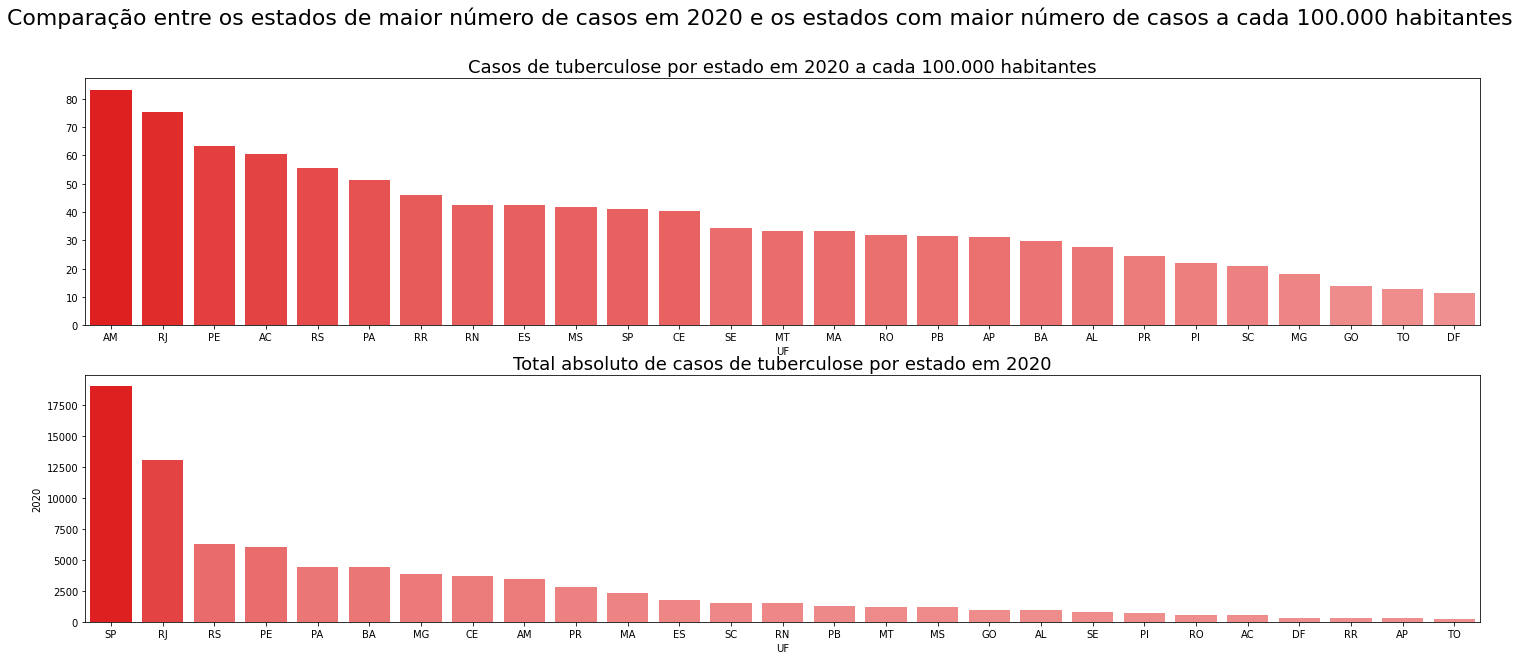

In [99]:
#casos por estado e população
por_uf_hab_2020 = dados['2020'][:-2].sort_values(ascending=False)*100000 / pop_2020
indices = dados['2020'][:-2].sort_values(ascending=False).index
por_uf_hab_2020 = por_uf_hab_2020.reindex(indices)
# x[x.index.duplicated()]
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(25)
sns.barplot( x = por_uf_hab_2020.sort_values(ascending=False).index, y = por_uf_hab_2020.sort_values(ascending=False).values, ax= ax1, palette=cria_palette_sat(por_uf_hab_2020.sort_values(ascending=False)))
sns.barplot(dados['2020'][:-2].sort_values(ascending=False).index, dados['2020'][:-2].sort_values(ascending=False), ax=ax2, palette=cria_palette_sat(dados['2020'][:-2].sort_values(ascending=False)))
ax1.title.set_text('Casos de tuberculose por estado em 2020 a cada 100.000 habitantes')
ax2.title.set_text('Total absoluto de casos de tuberculose por estado em 2020')
ax1.title.set_fontsize(18)
ax2.title.set_fontsize(18)
fig.suptitle('Comparação entre os estados de maior número de casos em 2020 e os estados com maior número de casos a cada 100.000 habitantes',fontsize=22)

plt.show()


Acima podemos perceber que, embora não sejam os mais populosos, alguns estados do Nordeste e Norte tomam o topo da lista no número de casos por 100.000 habitantes.

##Casos por região 
---
Já que acima pudemos observar alguns estados do Norte e Nordeste tomando à frente de estados mais populosos do Sudeste no números de casos proporcionais à população, agora vamos observar a incidência de casos por região do Brasil.

In [100]:
#visualizar dados por regiao
map_regiao =  {'SP':'Sudeste','MG':'Sudeste','RJ':'Sudeste','BA':'Nordeste','PR':'Sul','RS':'Sul','PE':'Nordeste','CE':'Nordeste','PA':'Norte','SC':'Sul','MA':'Nordeste','GO':'Centro-Oeste',
'AM':'Norte','ES':'Sudeste','PB':'Nordeste','RN':'Nordeste','MT':'Centro-Oeste','AL':'Nordeste','PI':'Nordeste','DF':'Centro-Oeste','MS':'Centro-Oeste','SE':'Nordeste','RO':'Norte','TO':'Norte','AC':'Norte',
'AP':'Norte','RR':'Norte'}
list_regioes = pd.DataFrame([[0,'Sudeste',0,0],[0,'Norte',0,0],[0,'Nordeste',0,0],[0,'Sul',0,0],[0,'Centro-Oeste',0,0]],columns=['Casos', 'Regiao','Populacao','Media'])
list_regioes.set_index('Regiao', inplace=True)

#Criando dataset de valores por região
for uf in por_uf_hab_2020.index:
  list_regioes.loc[map_regiao[uf]][0] = list_regioes.loc[map_regiao[uf]][0] + dados['2020'].loc[uf]
  list_regioes.loc[map_regiao[uf]][1] = list_regioes.loc[map_regiao[uf]][1] + pop_2020[uf]

for regiao in list_regioes.T:
  list_regioes['Media'].loc[regiao] = 100000* list_regioes['Casos'].loc[regiao] /list_regioes['Populacao'].loc[regiao] 
  
list_regioes

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Casos,Populacao,Media
Regiao,,,
Sudeste,37693,89012240,42.345862
Norte,9831,18672591,52.649362
Nordeste,21790,57374243,37.978715
Sul,10642,30192315,35.247380
Centro-Oeste,3681,16504303,22.303274


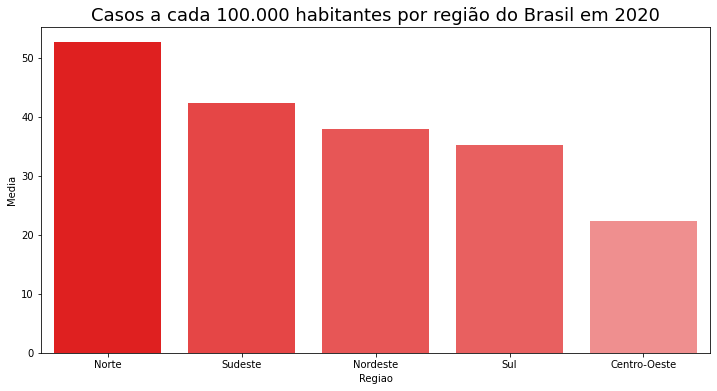

In [101]:
plt.figure(figsize=(12,6))
plt.title('Casos a cada 100.000 habitantes por região do Brasil em 2020', fontdict={'fontsize':18})
sns.barplot(data = list_regioes.sort_values(by='Media', ascending=False), x = list_regioes.sort_values(by='Media', ascending=False).index, y = 'Media', palette = cria_palette_sat(list_regioes.sort_values(by='Media', ascending=False)['Media']))

Como suspeitado anteriormente, quando agrupamos os dados por região, SP e RJ já não levam o Sudeste a ser o maior em números como nos números absolutos.
* A situação mais crítica no Norte pode ocorrer por deficiências sanitárias e menor acesso a tratamento.
* Isso nos leva a perceber dois pesos opostos em uma mesma balança, quando tratamos de metrópoles:
  - Grandes metrópoles urbanas levam a maior transmissão, aumentando os casos.
  - Grandes metrópoles urbanas tem maior presença do estado e atenção das redes de saúde pública para conscientização e tratamento de novos casos, o que leva a um controle mais eficiente.

**Na balança das metrópoles, por algum motivo a região Norte perdeu para as demais. Como dito antes, os estados com maior território da região podem oferecer menor acesso à saúde pública, o que facilita a permanência por mais tempo da doença em comunidades locais.**

**Apesar de ter mais recursos para combate à doença, o Sudeste vem logo após o Norte, tendo ainda um grande número de casos proporcionais. Isso pode mostrar o quão relevante é o fator de grandes aglomerações. Pois mesmo com mais hospitais e centros de tratamento disponíveis para a população, a circulação de grandes massas é um combustível poderoso para a sobrevivência da bactéria causadora da tuberculose em nosso país.**


#Conclusões
---
* Os picos na quantidade de casos registrados na série histórica ocorreram em 2018 e 2019. Porém, ao se considerar os valores relativos à população, os picos de casos a cada 100.000 habitantes ocorreram nos primeiros anos dos registros.
* O número relativo de casos apresenta uma queda sutil na série histórica. Mas uma queda bem tímida, cerca de 8% de 2001 a 2019. Mesmo com um programa nacional criado desde 2011 para conter a doença, a TB continua relativamente estável, muito devido ao abandono de tratamento por falta de conhecimento dos pacientes da importância de finalizá-lo nos últimos 2 meses de tratamento, mesmo após já se sentirem melhores
* Os estados com maior número de casos são os mais populosos, como SP e RJ
* Grandes aglomerações e condições sanitárias são fatores que favorecem a disseminação da doença
* A região Norte tem o maior número de casos proporcionais à população, ultrpassando o Sudeste neste ponto.
* A maior presença da doença na região Norte pode ter relação com a menor disponibilidade de rede assistencial de saúde e condições sanitárias nas comunidades mais carentes


#Referências
---
https://agencia.fiocruz.br/glossario-tuberculose

https://agencia.fiocruz.br/tuberculose


https://agencia.fiocruz.br/favelas-e-periferias-do-rio-de-janeiro-sofrem-com-tuberculose

https://agencia.fiocruz.br/liga-de-1900-e-marco-na-luta-contra-tuberculose-no-brasil

http://www.microbiologia.ufrj.br/portal/index.php/pt/graduacao/informe-da-graduacao/438-tuberculose-panorama-geral-e-a-situacao-no-brasil

https://agenciabrasil.ebc.com.br/saude/noticia/2020-03/brasil-registra-200-casos-de-tuberculose-por-dia